# Testing

# Import Required Libraries

In [ ]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from Bio.PDB import MMCIFParser, DSSP

# DSSP
> WINDOWS BELUM KOMPATIBEL! GUNAKAN OS LINUX!

> PASTIKAN PACKAGE DSSP & BIOPYTHON SUDAH TERINSTAL

[DSSP](https://github.com/PDB-REDO/dssp):
```bash
    git clone https://github.com/PDB-REDO/dssp.git
    cd dssp
    cmake -S . -B build
    cmake --build build
    cmake --install build
```
    
BIOPYTHON:
```python
    !pip install biopython
```

In [10]:
# Input mmcif file dari prediksi AF3
parser = MMCIFParser()

# Nama direktori file mmcif
direktori = "../Data/Predictions"

# Array untuk menyimpan data protein
data_protein = []

# Membaca setiap file mmcif
for i, nama_folder in enumerate(os.listdir(direktori)):
    nama_file = os.path.join(direktori, nama_folder, nama_folder + '_model_0.cif')
    struktur = parser.get_structure('struktur', nama_file)
    model = struktur[0]
    chain = model['A']
    dssp = DSSP(chain, os.path.join(direktori, nama_file), dssp='mkdssp')
    data_protein.append(dssp)

# Membuat array untuk menyimpan data residu dan sekunder struktur
data_fitur = []

# Membaca setiap data protein
for protein in data_protein:
    fitur = []
    for key, value in protein.items():
        fitur.append({'residue': key[1], 'dssp8': value[2]})
    data_fitur.append(fitur)

# Ubah array menjadi pandas dataframe
df = pd.DataFrame(data_fitur)

# Tamplikan 5 baris pertama
print(df.head())

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [ ]:
# Print semua output DSSP
for key in dssp.keys():
    residu = dssp[key]
    print(residu)

# Menggabungkan semua residu menjadi satu string yang disebut residu
residu = ""
# Menggabungkan semua struktur sekunder yang diprediksi menjadi satu string yang disebut ss
ss = ""

# Loop melalui kamus dssp dan tambahkan residu dan struktur sekunder ke string masing-masing
for key in dssp.keys():
    residu += dssp[key][1]
    ss += dssp[key][2]

# Cetak residu dan struktur sekunder
print("\n", residu)
print(ss)

(1, 'V', '-', 1.0, 360.0, 121.7, 0, 0.0, 2, -0.1, 0, 0.0, 0, 0.0)
(2, 'P', '-', 0.5441176470588235, -68.7, 146.5, 0, 0.0, 2, -0.0, 0, 0.0, 0, 0.0)
(3, 'S', '-', 0.46153846153846156, -72.8, 163.8, 1, -0.1, 4, -2.3, -2, -0.1, 5, -0.2)
(4, 'L', 'H', 0.6402439024390244, -60.8, -35.5, 1, -0.2, 4, -2.6, 2, -0.2, 33, -0.2)
(5, 'A', 'H', 0.2169811320754717, -62.4, -42.6, 2, -0.2, 4, -2.3, 1, -0.2, 32, -0.3)
(6, 'T', 'H', 0.4225352112676056, -63.8, -45.2, 2, -0.2, 4, -2.5, 1, -0.2, -2, -0.2)
(7, 'I', 'H', 0.378698224852071, -62.0, -42.8, -4, -2.3, 4, -2.6, 1, -0.2, -2, -0.2)
(8, 'S', 'H', 0.12307692307692308, -60.4, -44.1, -4, -2.6, 4, -1.5, 1, -0.2, -1, -0.2)
(9, 'L', 'H', 0.21341463414634146, -63.7, -44.3, -4, -2.3, 4, -0.6, 2, -0.2, -2, -0.2)
(10, 'E', 'H', 0.6237113402061856, -60.7, -43.6, -4, -2.5, 3, -0.9, 1, -0.2, 4, -0.4)
(11, 'N', 'H', 0.8152866242038217, -66.8, -28.0, -4, -2.6, 4, -0.2, 1, -0.2, -1, -0.2)
(12, 'S', 'H', 0.2230769230769231, -101.1, 3.7, -4, -1.5, 4, -3.0, -5, -0.2, 5, 

# Metrik Akurasi skor-Q
$$Q_s =  \frac{∑^s_{i=1} C_i}{n}×100\%$$

## Akurasi Q8 

In [ ]:
real_ss = cb513_testlabel[0]
print(real_ss)

In [ ]:
# Ganti Struktur sekunder yang masih berbeda format agar sama dengan label
ss = ss.replace("-", "C")
print(ss)

CCCHHHHHHHHHHHHHHHHHHHHTTTTTEEEEEEEEECTTSCEEEEEETTSHHHHHHHHHHHHHHHC


In [ ]:
# Calculate the accuracy of the predicted secondary structure (Q8 Score)
def calculate_accuracy(predicted, actual):
    correct = 0
    total = len(predicted)
    for p, a in zip(predicted, actual):
        if p == a:
            correct += 1
    return correct / total

# Calculate the accuracy of the predicted secondary structure
accuracy = calculate_accuracy(cb513_testlabel[0], ss)
print(accuracy)

0.7761194029850746


Visualisasi akurasi Q8

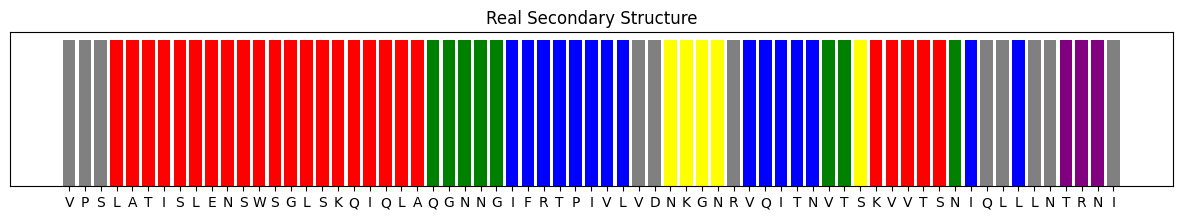

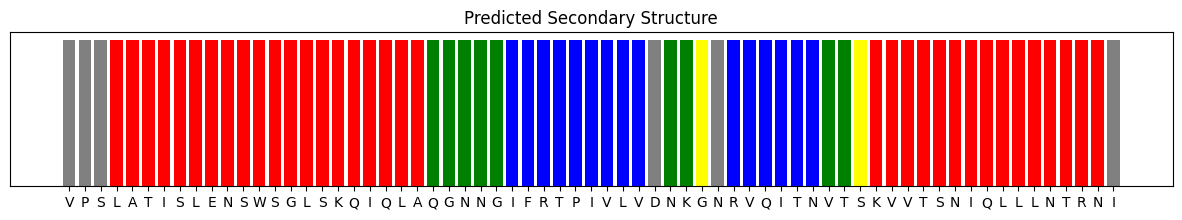

In [ ]:
real_ss = cb513_testlabel[0]

# Define colors for secondary structure elements using 8-state DSSP
colors = {'H': 'red', 'B': 'blue', 'E': 'blue', 'G': 'purple', 'I': 'orange', 'T': 'green', 'S': 'yellow', 'C': 'gray', '-': 'black'}

# Create a list of colors corresponding to the secondary structure
color_list = [colors[ss] for ss in ss]

# Plot
fig, ax = plt.subplots(figsize=(15, 2))
ax.bar(range(len(real_ss)), [1]*len(real_ss), color=[colors[ss] for ss in real_ss])
ax.set_xticks(range(len(real_ss)))
ax.set_xticklabels(residu, rotation=0, fontsize=10)
ax.set_yticks([])
ax.set_title("Real Secondary Structure")

fig, ax = plt.subplots(figsize=(15, 2))
ax.bar(range(len(ss)), [1]*len(ss), color=[colors[ss] for ss in ss])
ax.set_xticks(range(len(ss)))
ax.set_xticklabels(residu, rotation=0, fontsize=10)
ax.set_yticks([])
ax.set_title("Predicted Secondary Structure")

plt.show()

## Akurasi Q3

Tabel Konversi Q8 ke Q3
| DSSP 8-Class | 3-Class |
|--------------|---------|
| H            | H       |
| G            | H       |
| I            | H       |
| B            | E       |
| E            | E       |
| T            | C       |
| S            | C       |
| C            | C       |

In [ ]:
# Convert the original & predicted 8-state secondary structure to 3-state secondary structure
def convert_8state_to_3state(ss):
    ss_3state = ""
    for s in ss:
        if s in ['H', 'G', 'I']:
            ss_3state += 'H'
        elif s in ['E', 'B']:
            ss_3state += 'E'
        else:
            ss_3state += 'C'
    return ss_3state

cb513_testlabel_3state = cb513_testlabel.copy()
cb513_testlabel_3state[0] = convert_8state_to_3state(cb513_testlabel[0])
ss_3state = convert_8state_to_3state(ss)

print(cb513_testlabel_3state[0])
print(ss_3state)

CCCHHHHHHHHHHHHHHHHHHHHCCCCCEEEEEEEECCCCCCCEEEEECCCHHHHHCECCECCHHHC
CCCHHHHHHHHHHHHHHHHHHHHCCCCCEEEEEEEEECCCCCEEEEEECCCHHHHHHHHHHHHHHHC


In [ ]:
# Calculate the accuracy of the predicted secondary structure (Q3 Score)
def calculate_accuracy(predicted, actual):
    correct = 0
    total = len(predicted)
    for p, a in zip(predicted, actual):
        if p == a:
            correct += 1
    return correct / total

# Calculate the accuracy of the predicted secondary structure
accuracy = calculate_accuracy(cb513_testlabel_3state[0], ss_3state)
print(accuracy)

0.8656716417910447


Visualisasi akurasi Q3

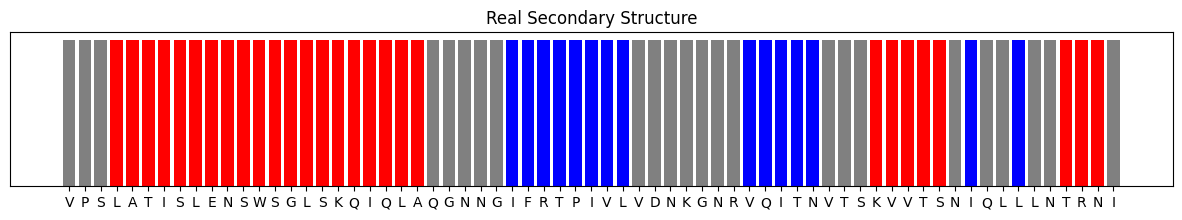

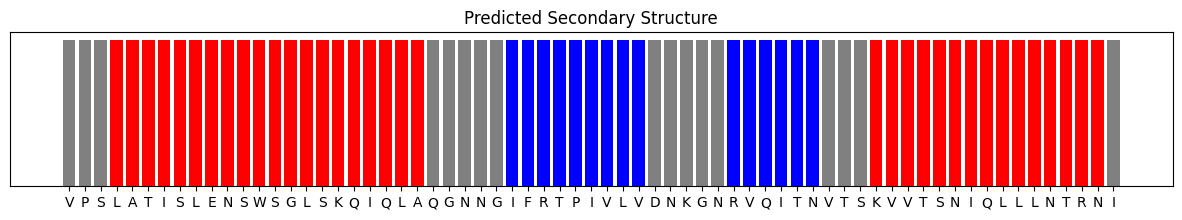

In [ ]:
# residue and secondary structure
residue = residu
predicted_ss = ss_3state
real_ss = cb513_testlabel_3state[0]

# Define colors for secondary structure elements using 3-state DSSP
colors = {'H': 'red', 'E': 'blue', 'C': 'gray', '-': 'black'}

# Create a list of colors corresponding to the secondary structure
color_list_real = [colors[ss] for ss in real_ss]
color_list_predicted = [colors[ss] for ss in predicted_ss]

# Plot
fig, ax = plt.subplots(figsize=(15, 2))
ax.bar(range(len(real_ss)), [1]*len(real_ss), color=color_list_real)
ax.set_xticks(range(len(real_ss)))
ax.set_xticklabels(residue, rotation=0, fontsize=10)
ax.set_yticks([])
ax.set_title("Real Secondary Structure")

fig, ax = plt.subplots(figsize=(15, 2))
ax.bar(range(len(predicted_ss)), [1]*len(predicted_ss), color=color_list_predicted)
ax.set_xticks(range(len(predicted_ss)))
ax.set_xticklabels(residue, rotation=0, fontsize=10)
ax.set_yticks([])
ax.set_title("Predicted Secondary Structure")

plt.show()